<a href="https://colab.research.google.com/github/Saad01042005/Churn_Analysis/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("/content/Customer_Data.csv")

In [21]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [22]:
df.tail()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
6413,43397-UTT,Female,41,No,Uttar Pradesh,6,33,NaN,Yes,Yes,...,Credit Card,74.40,896.75,0.0,0,37.96,934.71,Churned,Competitor,Competitor made better offer
6414,22240-HAR,Male,51,Yes,Haryana,0,19,Deal 1,No,NaN,...,Credit Card,45.25,3139.80,0.0,0,0.00,3139.80,Stayed,NaN,NaN
6415,78682-KER,Female,65,Yes,Kerala,14,25,NaN,Yes,Yes,...,Bank Withdrawal,74.95,2869.85,0.0,0,599.64,3469.49,Churned,Dissatisfaction,Product dissatisfaction
6416,17816-ODI,Male,23,No,Odisha,2,10,NaN,Yes,Yes,...,Credit Card,70.15,4480.70,0.0,0,2107.52,6588.22,Stayed,NaN,NaN
6417,34476-TAM,Male,73,No,Tamil Nadu,13,21,NaN,Yes,No,...,Bank Withdrawal,96.85,1235.55,0.0,0,346.84,1582.39,Stayed,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6418 non-null   object 
 1   Gender                       6418 non-null   object 
 2   Age                          6418 non-null   int64  
 3   Married                      6418 non-null   object 
 4   State                        6418 non-null   object 
 5   Number_of_Referrals          6418 non-null   int64  
 6   Tenure_in_Months             6418 non-null   int64  
 7   Value_Deal                   2870 non-null   object 
 8   Phone_Service                6418 non-null   object 
 9   Multiple_Lines               5796 non-null   object 
 10  Internet_Service             6418 non-null   object 
 11  Internet_Type                5028 non-null   object 
 12  Online_Security              5028 non-null   object 
 13  Online_Backup     

In [24]:
df[['Value_Deal', 'Internet_Type']]= df[['Value_Deal', 'Internet_Type']].fillna("None")
df[['Multiple_Lines','Online_Security','Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data']] = df[['Multiple_Lines','Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data']].fillna(0)
df[['Churn_Category', 'Churn_Reason']]=df[['Churn_Category', 'Churn_Reason']].fillna("No Churn")

In [25]:
df.isnull().sum()

,0
Customer_ID,0
Gender,0
Age,0
Married,0
State,0
Number_of_Referrals,0
Tenure_in_Months,0
Value_Deal,0
Phone_Service,0
Multiple_Lines,0


In [26]:
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000
mean,47.070739,7.427859,17.342786,63.652867,2280.374858,1.924944,6.718604,748.703468,3033.871987
std,16.703633,4.621519,10.576391,31.188823,2268.049985,7.849083,24.722533,847.672844,2866.505426
min,18.000000,0.000000,1.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,33.000000,3.000000,8.000000,30.562500,395.725000,0.000000,0.000000,70.805000,603.742500
50%,46.000000,7.000000,16.000000,70.100000,1396.125000,0.000000,0.000000,407.475000,2108.635000
75%,60.000000,11.000000,27.000000,89.750000,3783.600000,0.000000,0.000000,1182.917500,4801.537500
max,85.000000,15.000000,36.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [27]:
df['Age']=df['Age'].astype(float)
bins=[0,20,35,50, float("inf")]
labels=["0-20", "20-35", "35-50", "50+"]
df['Age']=pd.cut(df['Age'], bins=bins, labels=labels)

In [28]:
df.describe()

,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000
mean,7.427859,17.342786,63.652867,2280.374858,1.924944,6.718604,748.703468,3033.871987
std,4.621519,10.576391,31.188823,2268.049985,7.849083,24.722533,847.672844,2866.505426
min,0.000000,1.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,3.000000,8.000000,30.562500,395.725000,0.000000,0.000000,70.805000,603.742500
50%,7.000000,16.000000,70.100000,1396.125000,0.000000,0.000000,407.475000,2108.635000
75%,11.000000,27.000000,89.750000,3783.600000,0.000000,0.000000,1182.917500,4801.537500
max,15.000000,36.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Customer_ID                  6418 non-null   object  
 1   Gender                       6418 non-null   object  
 2   Age                          6418 non-null   category
 3   Married                      6418 non-null   object  
 4   State                        6418 non-null   object  
 5   Number_of_Referrals          6418 non-null   int64   
 6   Tenure_in_Months             6418 non-null   int64   
 7   Value_Deal                   6418 non-null   object  
 8   Phone_Service                6418 non-null   object  
 9   Multiple_Lines               6418 non-null   object  
 10  Internet_Service             6418 non-null   object  
 11  Internet_Type                6418 non-null   object  
 12  Online_Security              6418 non-null   object  
 13  Onl

In [30]:
df[["Online_Security", "Online_Backup", "Device_Protection_Plan", "Premium_Support", "Streaming_TV", "Streaming_Movies", "Streaming_Music", "Unlimited_Date"]]=df[["Online_Security", "Online_Backup", "Device_Protection_Plan", "Premium_Support", "Streaming_TV", "Streaming_Movies", "Streaming_Music", "Unlimited_Data"]].replace(0, "No Internet Service")

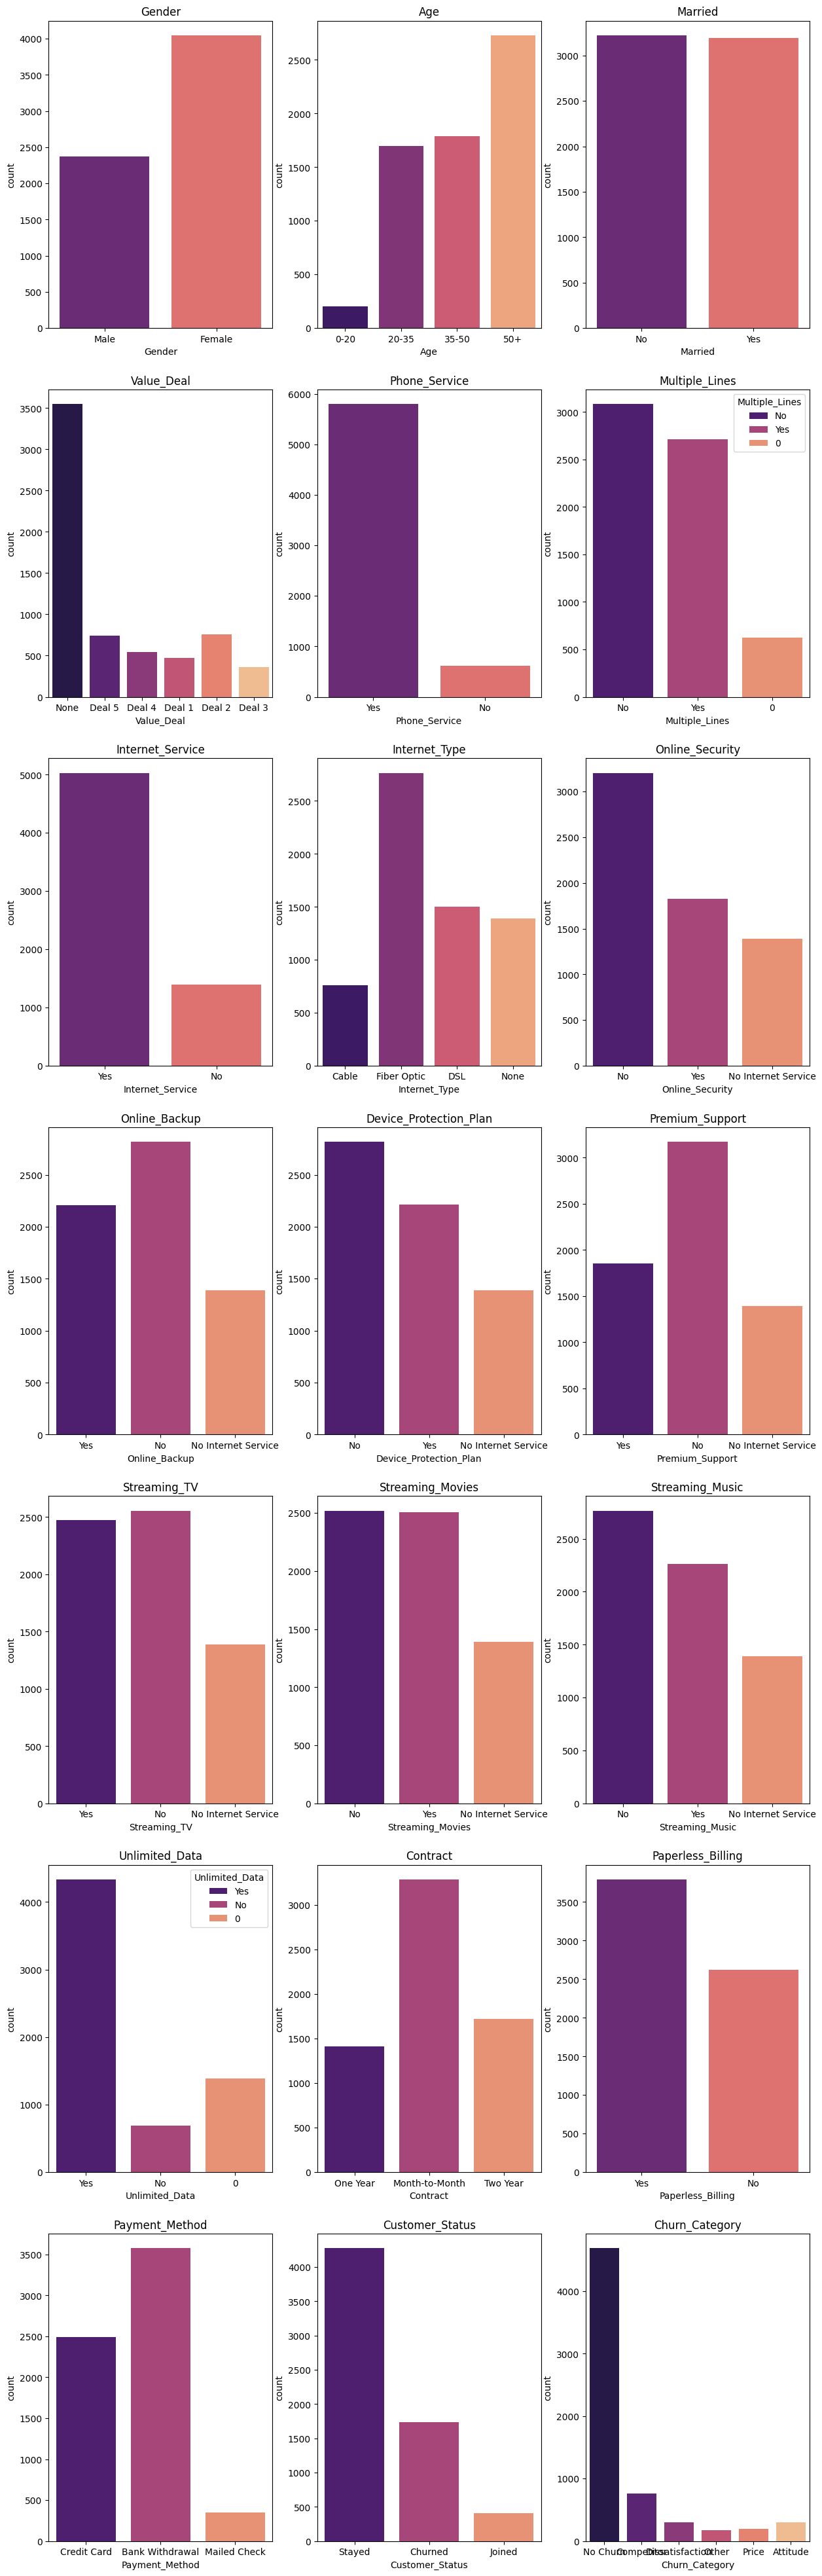

In [39]:
categorial_col=['Gender', 'Age', 'Married', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Customer_Status', 'Churn_Category']
plt.figure(figsize=(15,50))
for i, col in enumerate(categorial_col):
  plt.subplot(7,3,i+1)
  sns.countplot(x=col, data=df, hue=col, palette="magma")
  plt.title(col)
plt.show()

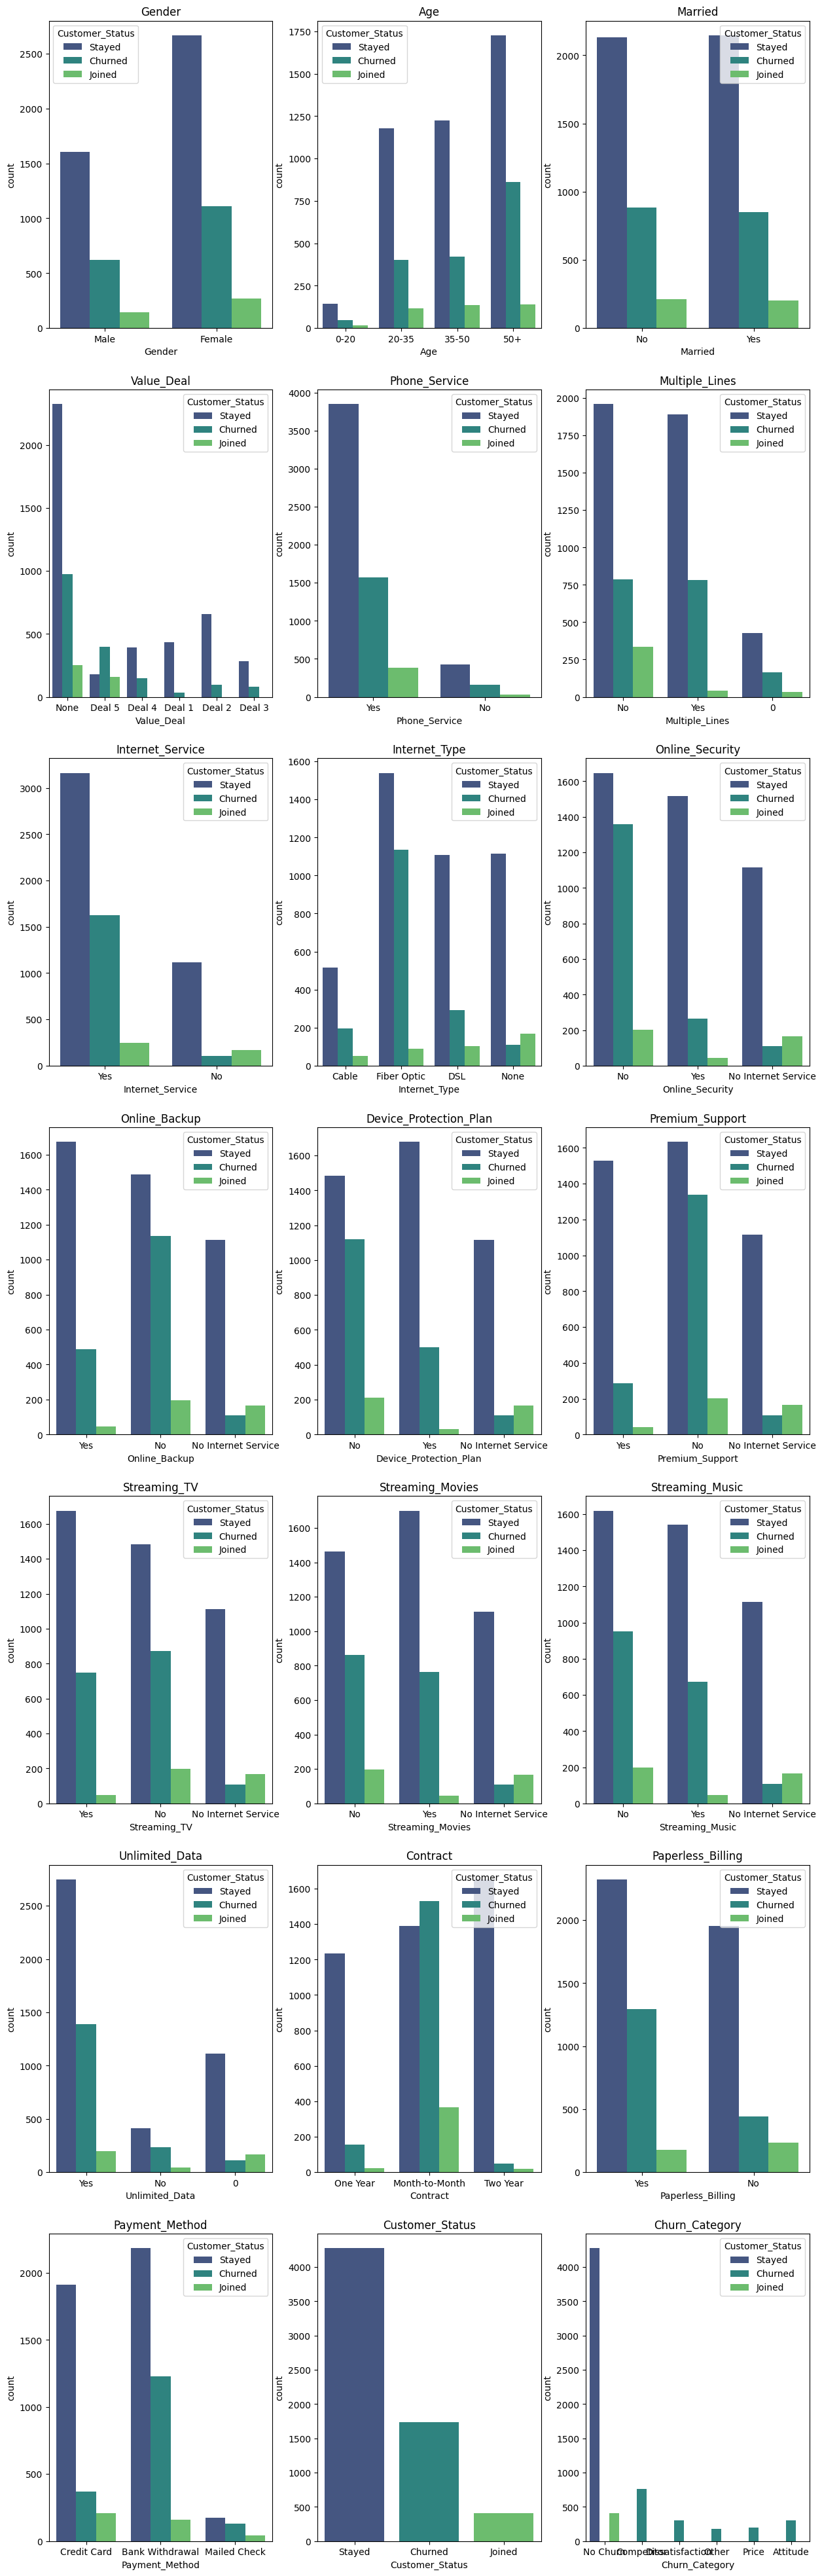

In [40]:
categorial_col=['Gender', 'Age', 'Married', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Customer_Status', 'Churn_Category']
plt.figure(figsize=(15,50))
for i, col in enumerate(categorial_col):
  plt.subplot(7,3,i+1)
  sns.countplot(x=col, data=df, hue="Customer_Status", palette="viridis")
  plt.title(col)
plt.show()

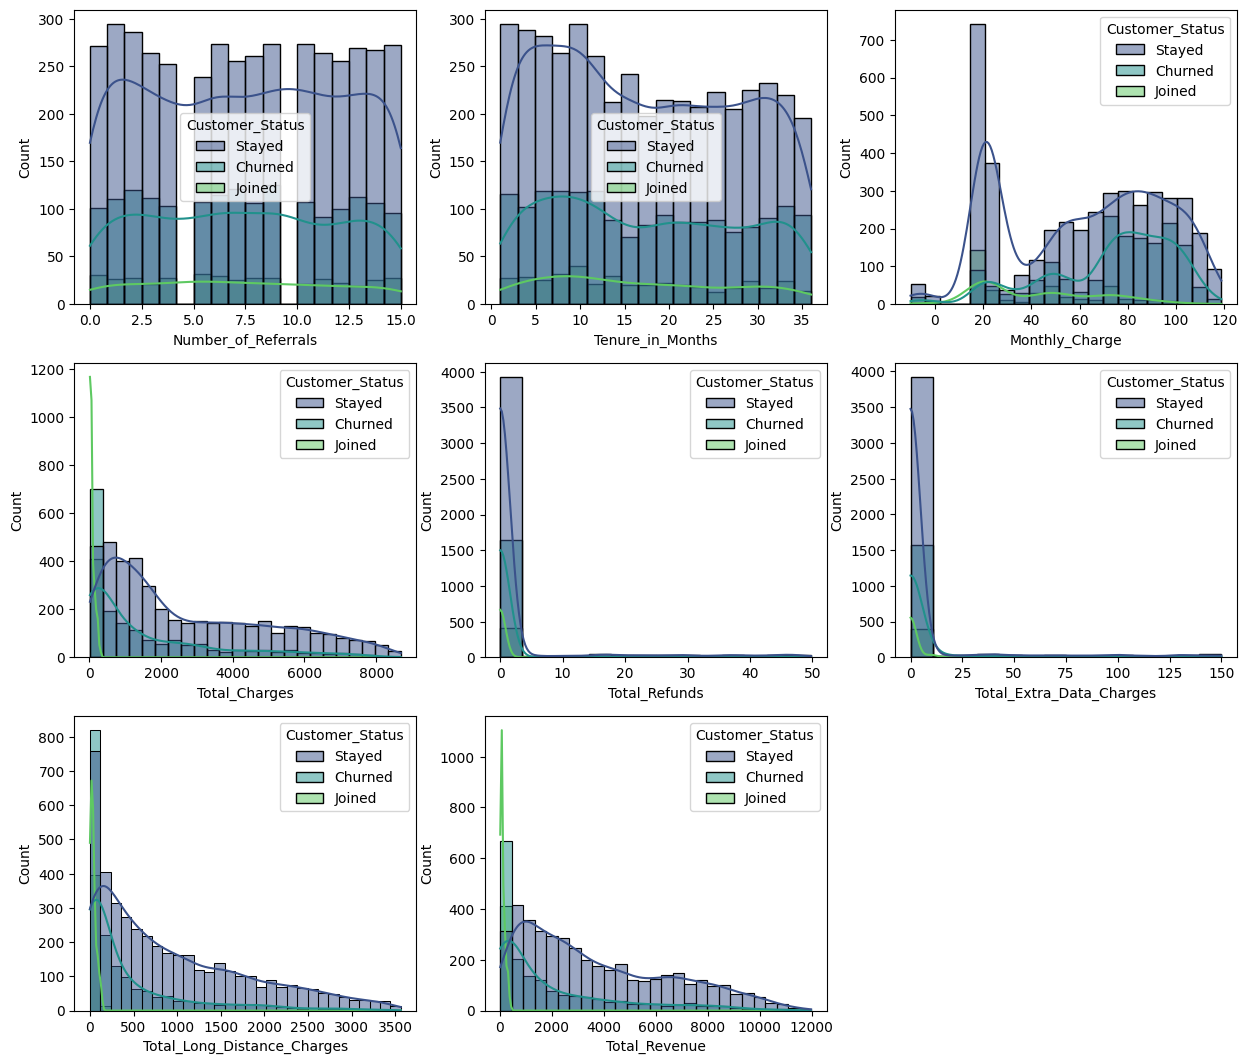

In [42]:
numerical_col=['Number_of_Referrals', 'Tenure_in_Months', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue']
plt.figure(figsize=(15,13))
for i, col in enumerate(numerical_col):
  plt.subplot(3,3,i+1)
  sns.histplot(x=col, data=df, hue="Customer_Status", kde=True, palette="viridis")
plt.show()

In [43]:
from google.colab import files
output_filename = 'cleaned_data.csv'
df.to_csv(output_filename, index=False)

print(f"DataFrame saved to Colab VM as '{output_filename}'")

try:
    files.download(output_filename)
    print(f"'{output_filename}' download initiated. Check your browser's download folder.")
except Exception as e:
    print(f"Error initiating download: {e}")
    print("If you're running this multiple times, you might need to click 'Allow pop-ups' for Colab in your browser.")

DataFrame saved to Colab VM as 'cleaned_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'cleaned_data.csv' download initiated. Check your browser's download folder.
